In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [109]:
# Load DataSet
df=pd.read_csv('/content/drive/MyDrive/Project/Steel_industry_data.csv')

**Check basic info on the data set**

In [110]:
# Displaying the First Five Rows
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


Data Description:

In [111]:
# DataFrame Dimensions
data_shape = df.shape
data_shape

(35040, 11)

In [112]:
num_rows = data_shape[0]
num_columns = data_shape[1]
print("Number of Samples:", num_rows)
print("Number of Features:", num_columns)

Number of Samples: 35040
Number of Features: 11


In [113]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [114]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Usage_kWh,35040.0,27.386892,33.444380,0.0,3.20,4.57,51.2375,157.18
Lagging_Current_Reactive.Power_kVarh,35040.0,13.035384,16.306000,0.0,2.30,5.00,22.6400,96.91
Leading_Current_Reactive_Power_kVarh,35040.0,3.870949,7.424463,0.0,0.00,0.00,2.0900,27.76
CO2(tCO2),35040.0,0.011524,0.016151,0.0,0.00,0.00,0.0200,0.07
Lagging_Current_Power_Factor,35040.0,80.578056,18.921322,0.0,63.32,87.96,99.0225,100.00
Leading_Current_Power_Factor,35040.0,84.367870,30.456535,0.0,99.70,100.00,100.0000,100.00
NSM,35040.0,42750.000000,24940.534317,0.0,21375.00,42750.00,64125.0000,85500.00


In [115]:
# Display a summary of the DataFrame, including column names, data types, and non-null value counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

 **Exploratory Data Analysis (EDA)**



Pairplots using seaborn

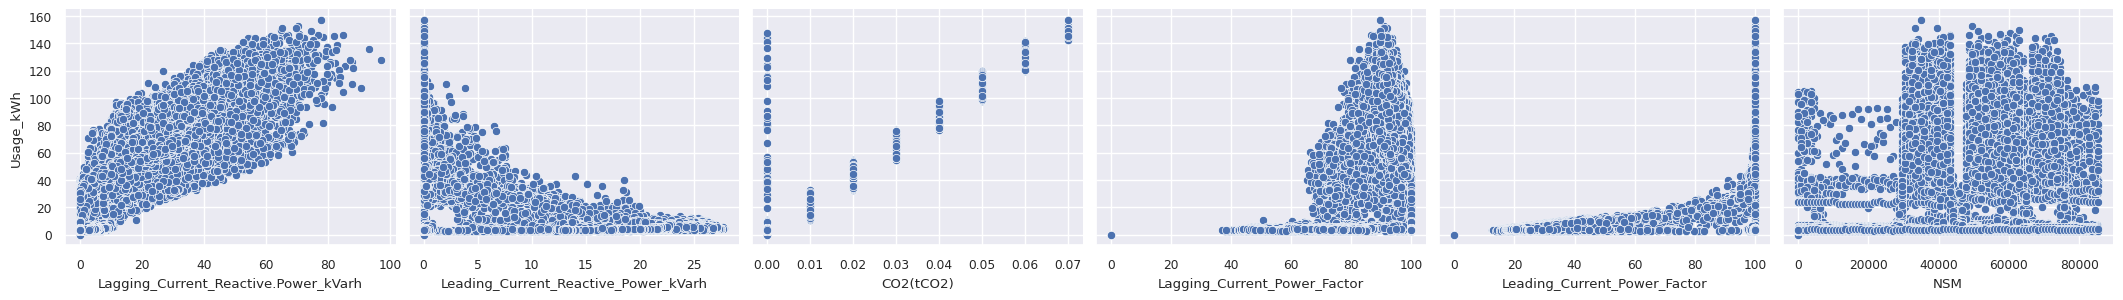

In [116]:
cols = ['Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
        'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']

sns.pairplot(df, x_vars=cols, y_vars='Usage_kWh', height=3, aspect=1.2, kind='scatter')
plt.show()

Average Usage by Week Status


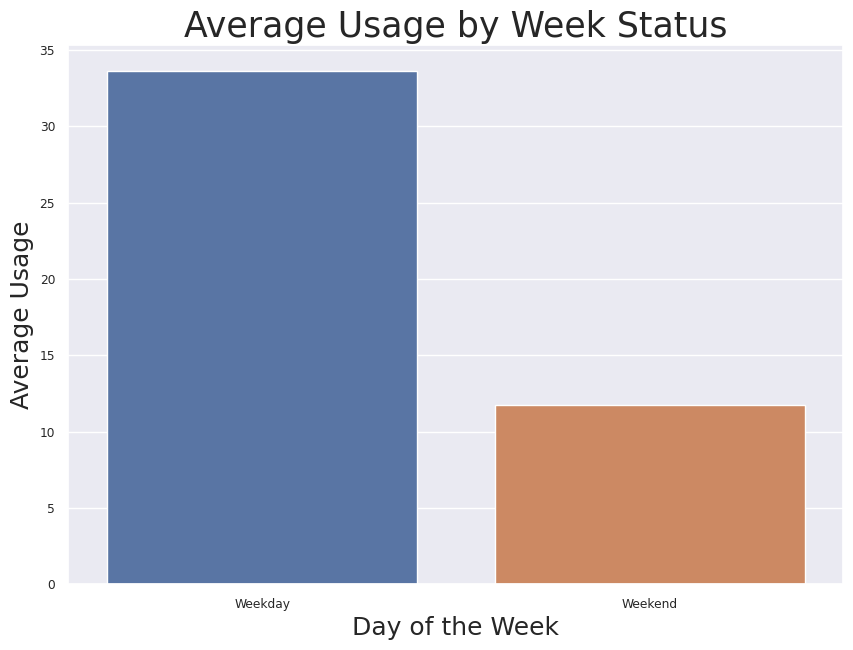

In [117]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x="WeekStatus", y="Usage_kWh",errorbar=None)
plt.xlabel("Day of the Week", fontsize=18)
plt.ylabel("Average Usage", fontsize=18)
plt.title("Average Usage by Week Status", fontsize=25)
plt.show()




Average Usage by Day of the Week

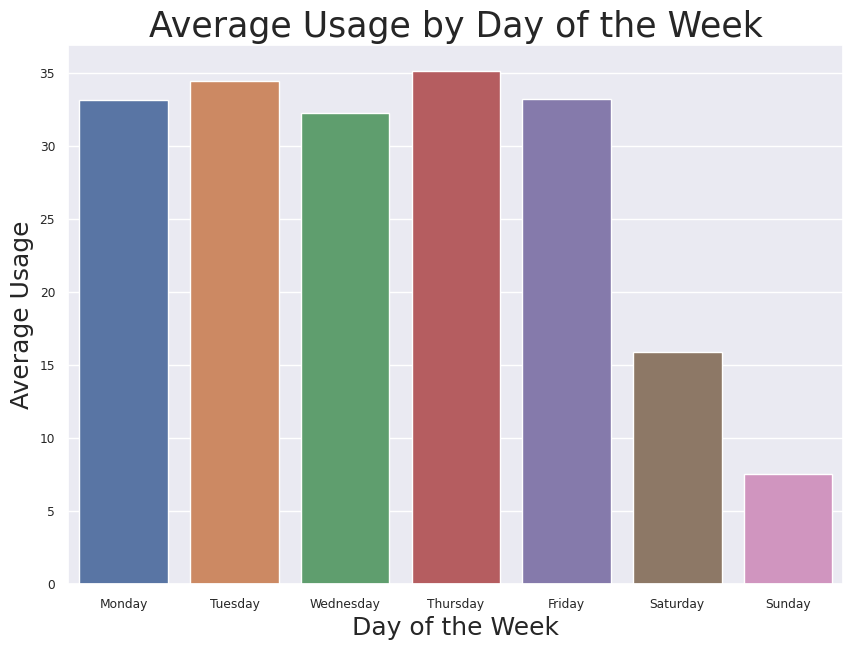

In [118]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x="Day_of_week", y="Usage_kWh",errorbar=None)
plt.xlabel("Day of the Week", fontsize=18)
plt.ylabel("Average Usage", fontsize=18)
plt.title("Average Usage by Day of the Week", fontsize=25)
plt.show()


Energy Consumption by Week Status and Load Type


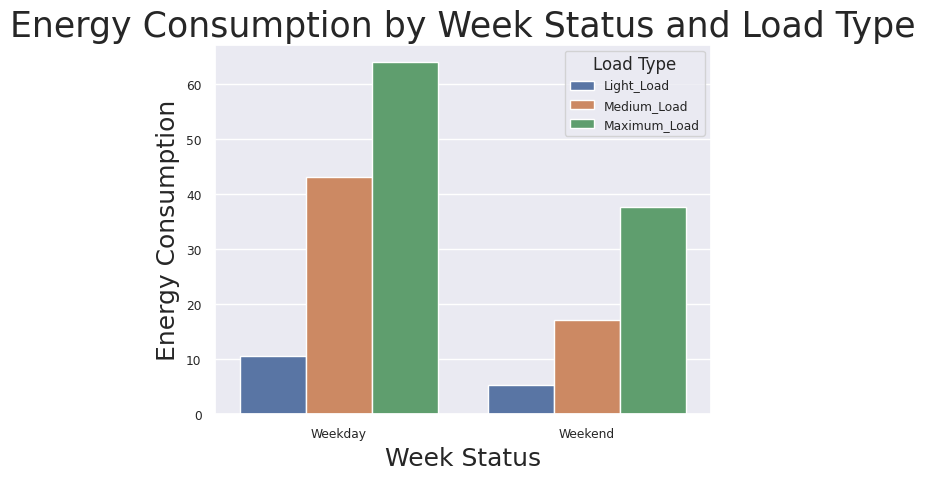

In [119]:
sns.barplot(data=df, x="WeekStatus", y="Usage_kWh", hue="Load_Type",errorbar=None)
plt.xlabel("Week Status", fontsize=18)
plt.ylabel("Energy Consumption", fontsize=18)
plt.title("Energy Consumption by Week Status and Load Type", fontsize=25)
plt.legend(title="Load Type", title_fontsize=12)
plt.show()


Correlation Matrix 

In [120]:
df.corr()

<ipython-input-120-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


Correlation Heatmap

<ipython-input-121-375ed499cbbd>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


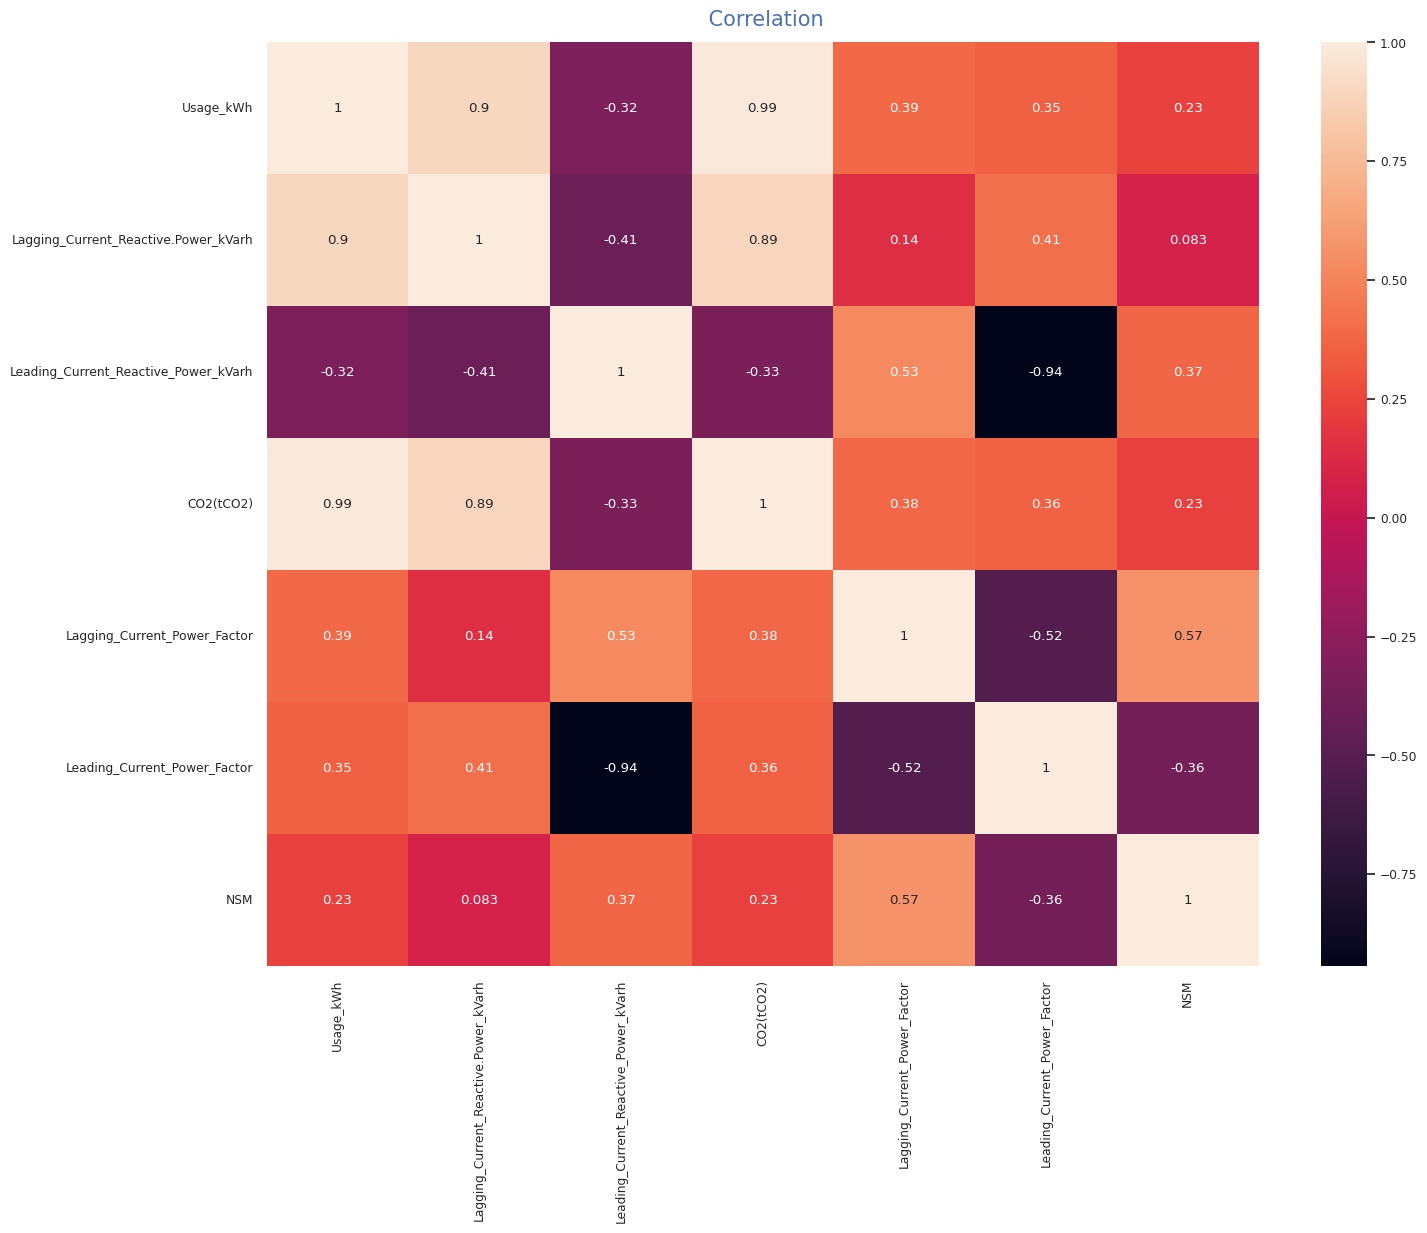

In [121]:
# Visualize the correlation using Heatmap
sns.set(font_scale=0.8)
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True)
plt.title(" Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

**Handling Missing And Categorical data**

In [122]:
# Calculate the number of missing values in each column of the DataFrame
missing_value_counts = df.isna().sum()
missing_value_counts

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [123]:
df.dtypes

date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object

In [124]:
df=df.drop(['date'], axis=1)

In [125]:
# Perform one-hot encoding on categorical variables
df = pd.get_dummies(df)

In [126]:
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,3.17,2.95,0.0,0.0,73.21,100.0,900,1,0,0,1,0,0,0,0,0,1,0,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,0,0,1,0,0,0,0,0,1,0,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,0,0,1,0,0,0,0,0,1,0,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,0,0,1,0,0,0,0,0,1,0,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,0,0,1,0,0,0,0,0,1,0,0


**Data Preprocessing**

 Splitting the DataFrame






In [127]:
#Independent Features
X = df.drop(['Usage_kWh'], axis=1)  
#Dependent Feature/Target
y=df.Usage_kWh    


Feature Selection


In [128]:
# Feature Selection using SelectKBest and f_regression
from sklearn.feature_selection import SelectKBest,f_regression
y_=y.astype('int')
select_reg =  SelectKBest(k=10, score_func=f_regression).fit(X, y_)


In [129]:
X_Select = select_reg.transform(X)
X_Select.shape

(35040, 10)

In [130]:
Selected_features = pd.DataFrame({'columns': X.columns,
                              'Kept': select_reg.get_support()})
Selected_features

,columns,Kept
0,Lagging_Current_Reactive.Power_kVarh,True
1,Leading_Current_Reactive_Power_kVarh,True
2,CO2(tCO2),True
3,Lagging_Current_Power_Factor,True
4,Leading_Current_Power_Factor,True
5,NSM,False
6,WeekStatus_Weekday,True
7,WeekStatus_Weekend,True
8,Day_of_week_Friday,False
9,Day_of_week_Monday,False


 Standardizing the Features

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_Select)

Test-train split

In [132]:
# Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training Set - X_train shape:", X_train.shape)
print("Testing Set - X_test shape:", X_test.shape)
print("Training Set - y_train shape:", y_train.shape)
print("Testing Set - y_test shape:", y_test.shape)


Training Set - X_train shape: (24528, 10)
Testing Set - X_test shape: (10512, 10)
Training Set - y_train shape: (24528,)
Testing Set - y_test shape: (10512,)


**Linear Regression Model**

In [133]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [134]:
#The intercept term of the linear model
lr.intercept_

27.421059176369095

In [135]:
# The coefficients of the linear model
lr.coef_


array([ 5.57750409e+00,  5.28997614e-01,  2.62637050e+01,  2.39738110e+00,
        1.94120238e+00, -1.87091675e+11, -1.87091675e+11,  1.00401123e-01,
       -9.03074894e-01, -2.25296174e-01])

In [136]:
y_pred=lr.predict(X_test)

In [137]:
lr_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
lr_model[0:5]

,Actual Value,Predicted Value,Difference
11356,2.88,3.094220,-0.214220
26543,60.77,70.359165,-9.589165
2445,120.42,124.535359,-4.115359
14649,3.13,2.533185,0.596815
32699,58.86,63.661978,-4.801978


Model Evaluation

In [138]:
print('LinearRegression model')
mean_squared_error=metrics.mean_squared_error(y_test,y_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(lr.score(X_train,y_train),4))
print('R sqaured testing',round(lr.score(X_test,y_test),4) )

LinearRegression model
Sqaured mean error 4.22
R squared training 0.9787
R sqaured testing 0.9841


Actual vs. Predicted Scatter Plot

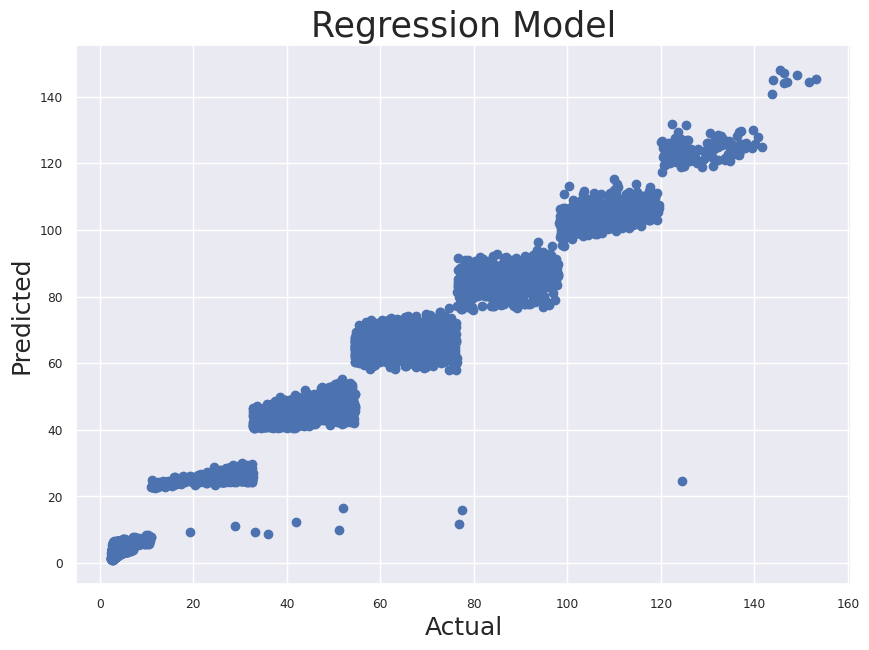

In [139]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("Regression Model", fontsize=25)
plt.show()


**Ridge Regression Model**

In [140]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.5)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5)

In [141]:
yridge_pred=ridge.predict(X_test)

In [142]:
ridge_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':yridge_pred,'Difference':y_test-yridge_pred})
ridge_model[0:5]

,Actual Value,Predicted Value,Difference
11356,2.88,3.093927,-0.213927
26543,60.77,70.360877,-9.590877
2445,120.42,124.531769,-4.111769
14649,3.13,2.531327,0.598673
32699,58.86,63.659942,-4.799942


Model Evaluation

In [143]:
print('Ridge Regression Model')
mean_squared_error=metrics.mean_squared_error(y_test,yridge_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(ridge.score(X_train,y_train),4))
print('R sqaured testing',round(ridge.score(X_test,y_test),4) )

Ridge Regression Model
Sqaured mean error 4.22
R squared training 0.9787
R sqaured testing 0.9841


Actual vs. Predicted Scatter Plot

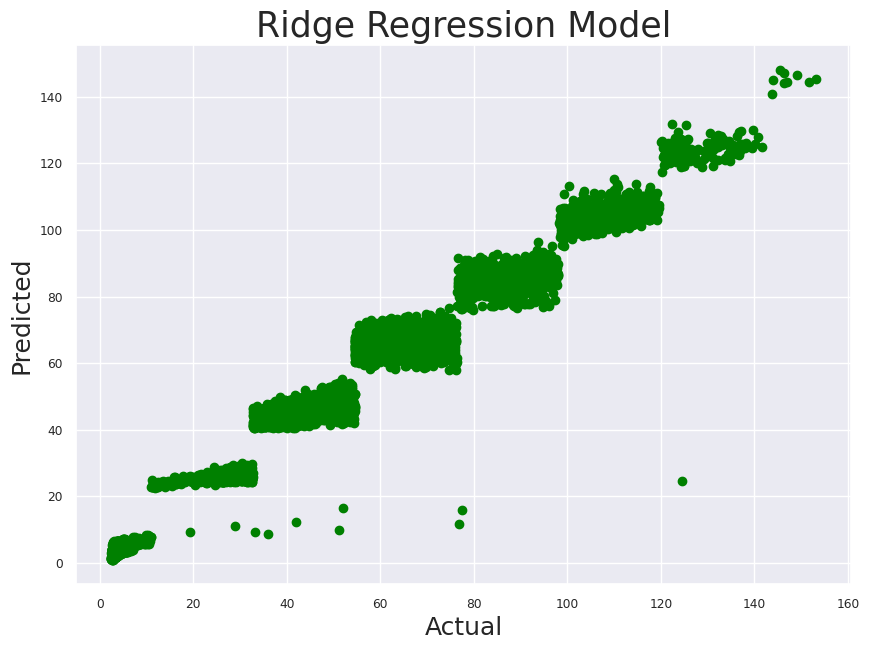

In [144]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, yridge_pred, color='green')
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("Ridge Regression Model", fontsize=25)
plt.show()


**Lasso Regression Model** 

In [145]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.5)
lasso.fit(X_train,y_train)

Lasso(alpha=0.5)

In [146]:
ylasso_pred=lasso.predict(X_test)

In [147]:
lasso_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':ylasso_pred,'Difference':y_test-ylasso_pred})
lasso_model[0:5]

,Actual Value,Predicted Value,Difference
11356,2.88,3.493368,-0.613368
26543,60.77,69.359858,-8.589858
2445,120.42,124.928062,-4.508062
14649,3.13,3.980659,-0.850659
32699,58.86,62.881252,-4.021252


Model Evaluation

In [148]:
print('Lasso Regression Model')
mean_squared_error=metrics.mean_squared_error(y_test,ylasso_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(lasso.score(X_train,y_train),4))
print('R sqaured testing',round(lasso.score(X_test,y_test),4) )

Lasso Regression Model
Sqaured mean error 4.25
R squared training 0.9776
R sqaured testing 0.9839


Actual vs. Predicted Scatter Plot

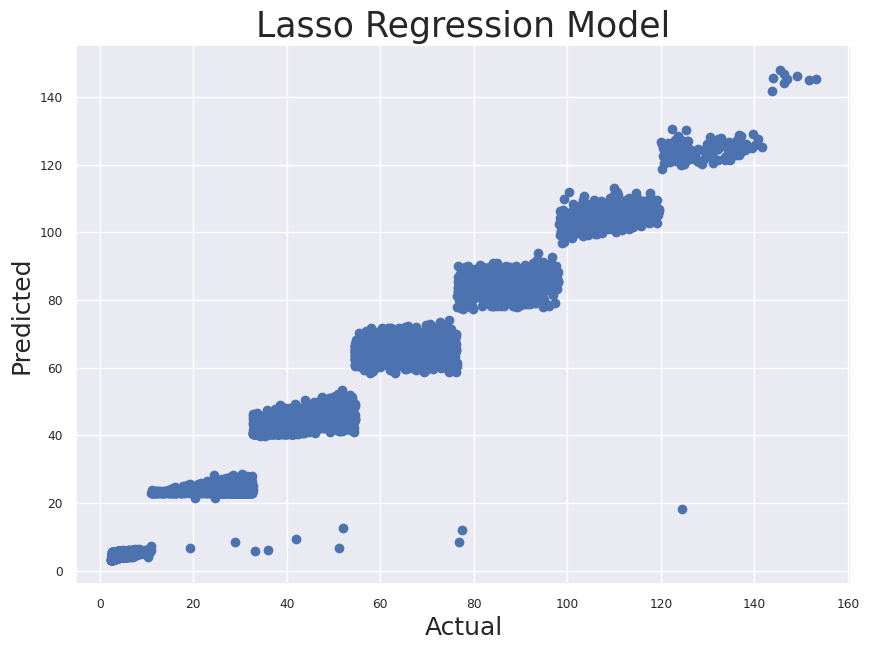

In [149]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, ylasso_pred)
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("Lasso Regression Model", fontsize=25)
plt.show()



**ElasticNet Regression Model** 


In [150]:
from sklearn.linear_model import ElasticNet
elasticNet=ElasticNet(alpha=0.5)
elasticNet.fit(X_train,y_train)

ElasticNet(alpha=0.5)

In [151]:
yelasticNet_pred=elasticNet.predict(X_test)

In [152]:
elasticNet_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':yelasticNet_pred,'Difference':y_test-yelasticNet_pred})
elasticNet_model[0:5]

,Actual Value,Predicted Value,Difference
11356,2.88,4.245874,-1.365874
26543,60.77,72.963287,-12.193287
2445,120.42,110.137992,10.282008
14649,3.13,1.770972,1.359028
32699,58.86,57.339843,1.520157


Model Evaluation

In [153]:
print('ElasticNet Regression model')
mean_squared_error=metrics.mean_squared_error(y_test,yelasticNet_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(elasticNet.score(X_train,y_train),4))
print('R sqaured testing',round(elasticNet.score(X_test,y_test),4) )

ElasticNet Regression model
Sqaured mean error 6.76
R squared training 0.9566
R sqaured testing 0.9592


Actual vs. Predicted Scatter Plot

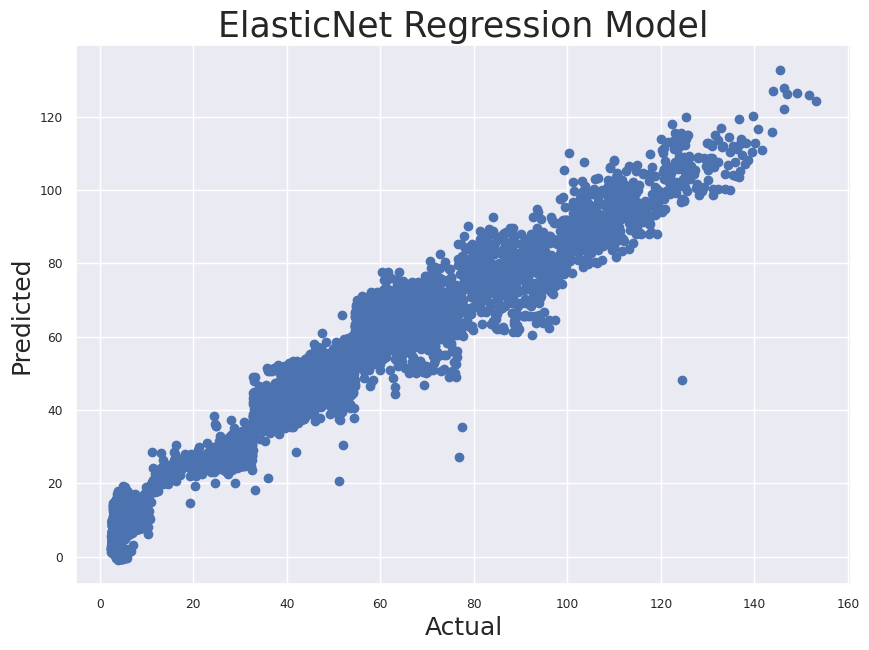

In [154]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, yelasticNet_pred)
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("ElasticNet Regression Model", fontsize=25)
plt.show()


**Support Vector Regression Model**

In [155]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR()

In [156]:
yregressor_pred = regressor.predict(X_test)
regressor_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':yregressor_pred,'Difference':y_test-yregressor_pred})
regressor_model[0:5]

,Actual Value,Predicted Value,Difference
11356,2.88,2.900659,-0.020659
26543,60.77,60.664819,0.105181
2445,120.42,123.828997,-3.408997
14649,3.13,3.170616,-0.040616
32699,58.86,61.481721,-2.621721


In [157]:
print('Support Vector Regression Model')
mean_squared_error=metrics.mean_squared_error(y_test,yregressor_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(regressor.score(X_train,y_train),4))
print('R sqaured testing',round(regressor.score(X_test,y_test),4) )

Support Vector Regression Model
Sqaured mean error 2.57
R squared training 0.9936
R sqaured testing 0.9941


Actual vs. Predicted Scatter Plot

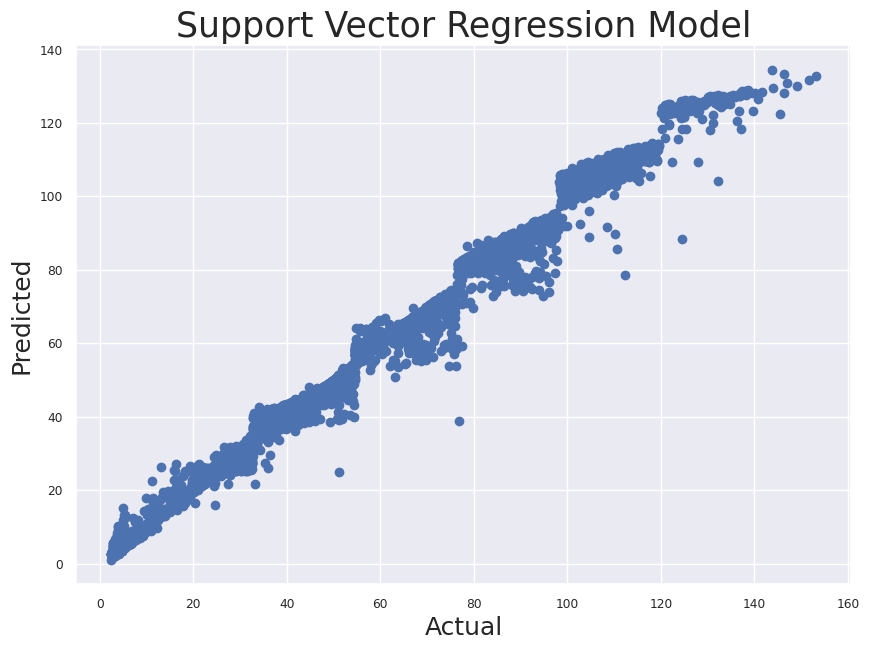

In [158]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test,yregressor_pred)
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("Support Vector Regression Model", fontsize=25)
plt.show()

**Regression Models Comparison**

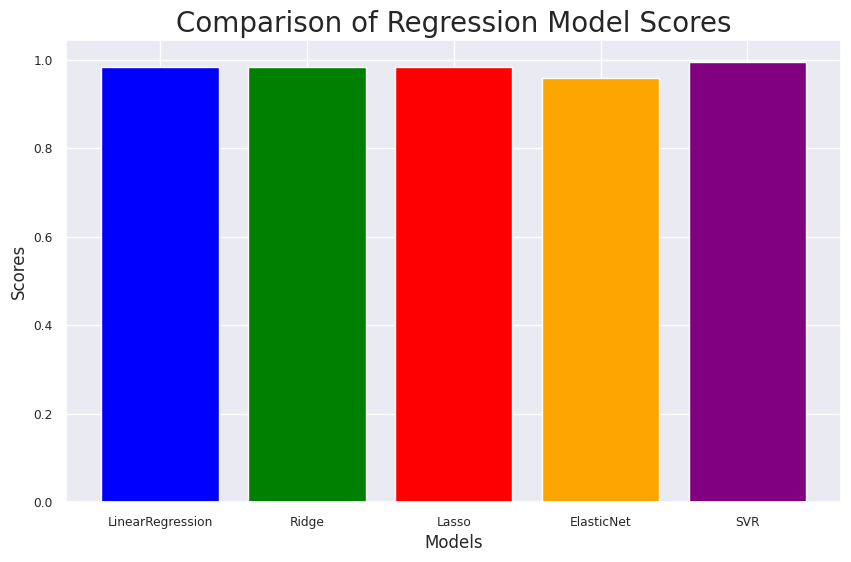

In [159]:
# Comparison of Regression Model R2 Scores
models = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet', 'SVR']
score = [lr.score(X_test, y_test),
         ridge.score(X_test, y_test),
         lasso.score(X_test, y_test),
         elasticNet.score(X_test, y_test),
         regressor.score(X_test, y_test)]
colors = ['blue', 'green', 'red', 'orange', 'purple']

plt.figure(figsize=(10, 6))
plt.bar(models, score, color=colors)
plt.xlabel('Models',fontsize=12)
plt.ylabel('Scores',fontsize=12)
plt.title('Comparison of Regression Model Scores',fontsize=20)
plt.show()


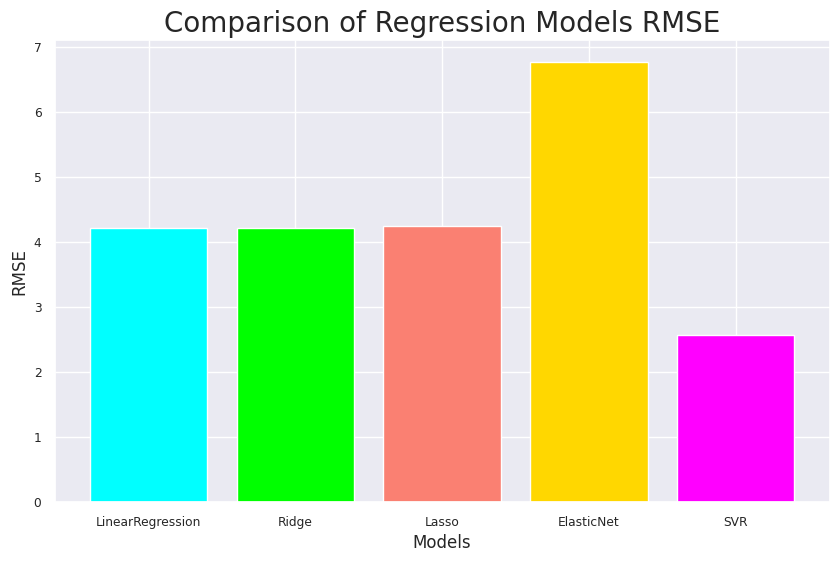

In [160]:
# Comparison of Regression Models RMSE
rmse = [np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, yridge_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, ylasso_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, yelasticNet_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, yregressor_pred))]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse, color=['cyan', 'lime', 'salmon', 'gold', 'magenta'])
plt.xlabel('Models',fontsize=12)
plt.ylabel('RMSE',fontsize=12)
plt.title('Comparison of Regression Models RMSE',fontsize=20)
plt.show()
